### Import libraries.

In [231]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score

### Load the data.

In [232]:
loan_data  = pd.read_csv(r"C:\Users\HIMA BINDU\PycharmProjects\MLP ML\.venv\LoanApprovalPrediction\dataset/loan_train.csv" )
test_data = pd.read_csv(r'C:\Users\HIMA BINDU\PycharmProjects\MLP ML\.venv\LoanApprovalPrediction\dataset/loan_test.csv')

### Perform EDA.

Shape:

In [233]:
print('Train Set:',loan_data.shape,'\nTest Set:',test_data.shape)

Train Set: (491, 14) 
Test Set: (123, 12)


First few records:

In [234]:
loan_data.head()

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,LP002305,Female,No,0,Graduate,No,4547,0.0,115.0,360.0,1.0,Semiurban,1
1,1,LP001715,Male,Yes,3+,Not Graduate,Yes,5703,0.0,130.0,360.0,1.0,Rural,1
2,2,LP002086,Female,Yes,0,Graduate,No,4333,2451.0,110.0,360.0,1.0,Urban,0
3,3,LP001136,Male,Yes,0,Not Graduate,Yes,4695,0.0,96.0,NaN,1.0,Urban,1
4,4,LP002529,Male,Yes,2,Graduate,No,6700,1750.0,230.0,300.0,1.0,Semiurban,1


In [235]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001116,Male,No,0,Not Graduate,No,3748,1668.0,110.0,360.0,1.0,Semiurban
1,LP001488,Male,Yes,3+,Graduate,No,4000,7750.0,290.0,360.0,1.0,Semiurban
2,LP002138,Male,Yes,0,Graduate,No,2625,6250.0,187.0,360.0,1.0,Rural
3,LP002284,Male,No,0,Not Graduate,No,3902,1666.0,109.0,360.0,1.0,Rural
4,LP002328,Male,Yes,0,Not Graduate,No,6096,0.0,218.0,360.0,0.0,Rural


Remove the "Unnamed: 0" column from loan_data.

In [236]:
loan_data.drop('Unnamed: 0',axis=1,inplace=True)

In [237]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491 entries, 0 to 490
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            491 non-null    object 
 1   Gender             481 non-null    object 
 2   Married            490 non-null    object 
 3   Dependents         482 non-null    object 
 4   Education          491 non-null    object 
 5   Self_Employed      462 non-null    object 
 6   ApplicantIncome    491 non-null    int64  
 7   CoapplicantIncome  491 non-null    float64
 8   LoanAmount         475 non-null    float64
 9   Loan_Amount_Term   478 non-null    float64
 10  Credit_History     448 non-null    float64
 11  Property_Area      491 non-null    object 
 12  Loan_Status        491 non-null    int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 50.0+ KB


In [238]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            123 non-null    object 
 1   Gender             120 non-null    object 
 2   Married            121 non-null    object 
 3   Dependents         117 non-null    object 
 4   Education          123 non-null    object 
 5   Self_Employed      120 non-null    object 
 6   ApplicantIncome    123 non-null    int64  
 7   CoapplicantIncome  123 non-null    float64
 8   LoanAmount         117 non-null    float64
 9   Loan_Amount_Term   122 non-null    float64
 10  Credit_History     116 non-null    float64
 11  Property_Area      123 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 11.7+ KB


Lets describe the dataset.

In [239]:
loan_data.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,491,481,490,482,491,462,491.000000,491.000000,475.000000,478.000000,448.000000,491,491.000000
unique,491,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,NaN
top,LP002305,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,NaN
freq,1,393,324,276,388,398,NaN,NaN,NaN,NaN,NaN,186,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,5401.189409,1589.730998,145.014737,341.297071,0.848214,NaN,0.698574
std,NaN,NaN,NaN,NaN,NaN,NaN,6419.427177,2919.320624,86.310534,66.964051,0.359214,NaN,0.459345
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,17.000000,12.000000,0.000000,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,2923.500000,0.000000,100.000000,360.000000,1.000000,NaN,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,3865.000000,1229.000000,126.000000,360.000000,1.000000,NaN,1.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,5705.500000,2251.500000,162.000000,360.000000,1.000000,NaN,1.000000


In [240]:
test_data.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
count,123,120,121,117,123,120,123.000000,123.000000,117.000000,122.000000,116.000000,123
unique,123,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3
top,LP001116,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban
freq,1,96,74,69,92,102,NaN,NaN,NaN,NaN,NaN,47
mean,NaN,NaN,NaN,NaN,NaN,NaN,5412.520325,1747.048780,152.085470,344.754098,0.818966,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,4691.249575,2962.400129,82.703623,57.499021,0.386717,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,210.000000,0.000000,9.000000,60.000000,0.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2664.000000,0.000000,104.000000,360.000000,1.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3601.000000,1014.000000,131.000000,360.000000,1.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,6110.500000,2413.000000,180.000000,360.000000,1.000000,NaN


Remove the 'Loan_ID' feature as it has cardinality equal to the length of the dataset, so of not much use.

In [241]:
loan_data.drop('Loan_ID',axis=1,inplace=True)
test_data.drop('Loan_ID',axis=1,inplace=True)

Check for Nulls.

In [242]:
loan_data.isnull().sum()

Gender               10
Married               1
Dependents            9
Education             0
Self_Employed        29
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           16
Loan_Amount_Term     13
Credit_History       43
Property_Area         0
Loan_Status           0
dtype: int64

In [243]:
test_data.isnull().sum()

Gender               3
Married              2
Dependents           6
Education            0
Self_Employed        3
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           6
Loan_Amount_Term     1
Credit_History       7
Property_Area        0
dtype: int64

Total rows with null values:

In [244]:
loan_data.shape[0] - loan_data.dropna().shape[0]

110

There are nulls and we shall have to analyze each of the feature to see how to impute/not.

Nulls in Gender:

In [245]:
loan_data[loan_data.Gender.isnull()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
59,NaN,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,1
125,NaN,No,0,Graduate,No,3583,0.0,96.0,360.0,1.0,Urban,0
133,NaN,Yes,0,Graduate,No,3087,2210.0,136.0,360.0,0.0,Semiurban,0
243,NaN,Yes,0,Graduate,Yes,2083,4083.0,160.0,360.0,NaN,Semiurban,1
360,NaN,Yes,3+,Graduate,No,23803,0.0,370.0,360.0,1.0,Rural,1
410,NaN,Yes,0,Graduate,No,16692,0.0,110.0,360.0,1.0,Semiurban,1
465,NaN,Yes,0,Graduate,Yes,674,5296.0,168.0,360.0,1.0,Rural,1
470,NaN,Yes,2,Graduate,No,2873,1872.0,132.0,360.0,0.0,Semiurban,0
475,NaN,No,0,Graduate,No,4750,0.0,94.0,360.0,1.0,Semiurban,1
486,NaN,Yes,1,Graduate,Yes,9833,1833.0,182.0,180.0,1.0,Urban,1


In [246]:
test_data[test_data.Gender.isnull()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
66,NaN,No,3+,Graduate,Yes,9357,0.0,292.0,360.0,1.0,Semiurban
105,NaN,Yes,0,Graduate,No,2473,1843.0,159.0,360.0,1.0,Rural
108,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural


In [247]:
loan_data.Gender.value_counts()

Male      393
Female     88
Name: Gender, dtype: int64

Lets replace with Mode for gender.

In [248]:
mode_gender=loan_data.Gender.mode()[0]
print(mode_gender)
loan_data.Gender.fillna(mode_gender,inplace=True)
test_data.Gender.fillna(mode_gender,inplace=True)

Male


Check if its imputed properly or not.

In [249]:
print(loan_data.loc[59])
print(test_data.loc[66])

Gender                   Male
Married                   Yes
Dependents                 3+
Education            Graduate
Self_Employed              No
ApplicantIncome         51763
CoapplicantIncome         0.0
LoanAmount              700.0
Loan_Amount_Term        300.0
Credit_History            1.0
Property_Area           Urban
Loan_Status                 1
Name: 59, dtype: object
Gender                    Male
Married                     No
Dependents                  3+
Education             Graduate
Self_Employed              Yes
ApplicantIncome           9357
CoapplicantIncome          0.0
LoanAmount               292.0
Loan_Amount_Term         360.0
Credit_History             1.0
Property_Area        Semiurban
Name: 66, dtype: object


Nulls in 'Married' feature.

In [250]:
loan_data[loan_data.Married.isnull()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
41,Male,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,1


In [251]:
test_data[test_data.Married.isnull()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
29,Female,NaN,NaN,Graduate,No,10047,0.0,NaN,240.0,1.0,Semiurban
48,Male,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban


In [252]:
mode_married=loan_data.Married.mode()[0]
print(mode_married)

Yes


In [253]:
loan_data.Married.fillna(mode_married,inplace=True)
test_data.Married.fillna(mode_married,inplace=True)

In [254]:
loan_data.loc[41]

Gender                    Male
Married                    Yes
Dependents                 NaN
Education             Graduate
Self_Employed               No
ApplicantIncome           4758
CoapplicantIncome          0.0
LoanAmount               158.0
Loan_Amount_Term         480.0
Credit_History             1.0
Property_Area        Semiurban
Loan_Status                  1
Name: 41, dtype: object

In [255]:
test_data.loc[29]

Gender                  Female
Married                    Yes
Dependents                 NaN
Education             Graduate
Self_Employed               No
ApplicantIncome          10047
CoapplicantIncome          0.0
LoanAmount                 NaN
Loan_Amount_Term         240.0
Credit_History             1.0
Property_Area        Semiurban
Name: 29, dtype: object

Nulls in 'Dependents'

In [256]:
loan_data[loan_data.Dependents.isnull()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
11,Male,Yes,NaN,Not Graduate,No,3523,3230.0,152.0,360.0,0.0,Rural,0
41,Male,Yes,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,1
55,Male,No,NaN,Graduate,No,2987,0.0,88.0,360.0,0.0,Semiurban,0
127,Male,Yes,NaN,Graduate,No,5667,2667.0,180.0,360.0,1.0,Rural,1
281,Male,Yes,NaN,Graduate,No,5116,1451.0,165.0,360.0,0.0,Urban,0
348,Female,No,NaN,Graduate,No,5417,0.0,143.0,480.0,0.0,Urban,0
357,Female,No,NaN,Graduate,No,3813,0.0,116.0,180.0,1.0,Urban,1
407,Male,Yes,NaN,Graduate,Yes,5503,4490.0,70.0,NaN,1.0,Semiurban,1
453,Male,Yes,NaN,Not Graduate,No,2875,1750.0,105.0,360.0,1.0,Semiurban,1


In [257]:
test_data[test_data.Dependents.isnull()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
26,Male,Yes,NaN,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban
29,Female,Yes,NaN,Graduate,No,10047,0.0,NaN,240.0,1.0,Semiurban
39,Male,Yes,NaN,Not Graduate,Yes,4735,0.0,138.0,360.0,1.0,Urban
48,Male,Yes,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban
73,Male,Yes,NaN,Not Graduate,No,3074,1800.0,123.0,360.0,0.0,Semiurban
106,Male,No,NaN,Graduate,No,2833,0.0,71.0,360.0,1.0,Urban


In [258]:
loan_data.Dependents.value_counts()

0     276
1      85
2      78
3+     43
Name: Dependents, dtype: int64

In [259]:
mode_Dependents=loan_data.Dependents.mode()[0]
print(mode_Dependents)

0


In [260]:
loan_data.Dependents.fillna(mode_Dependents,inplace=True)
test_data.Dependents.fillna(mode_Dependents,inplace=True)

In [261]:
print(loan_data.loc[11])
print(test_data.loc[26])

Gender                       Male
Married                       Yes
Dependents                      0
Education            Not Graduate
Self_Employed                  No
ApplicantIncome              3523
CoapplicantIncome          3230.0
LoanAmount                  152.0
Loan_Amount_Term            360.0
Credit_History                0.0
Property_Area               Rural
Loan_Status                     0
Name: 11, dtype: object
Gender                   Male
Married                   Yes
Dependents                  0
Education            Graduate
Self_Employed              No
ApplicantIncome         13650
CoapplicantIncome         0.0
LoanAmount                NaN
Loan_Amount_Term        360.0
Credit_History            1.0
Property_Area           Urban
Name: 26, dtype: object


Nulls in 'Self_Employed'.

In [262]:
loan_data[loan_data.Self_Employed.isnull()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
38,Male,Yes,1,Graduate,NaN,3717,2925.0,151.0,360.0,NaN,Semiurban,0
63,Male,Yes,0,Graduate,NaN,3539,1376.0,55.0,360.0,1.0,Rural,0
79,Male,Yes,0,Graduate,NaN,6256,0.0,160.0,360.0,NaN,Urban,1
119,Male,Yes,1,Graduate,NaN,4166,3369.0,201.0,360.0,NaN,Urban,0
132,Male,No,0,Not Graduate,NaN,2550,2042.0,126.0,360.0,1.0,Rural,1
164,Female,No,0,Graduate,NaN,2764,1459.0,110.0,360.0,1.0,Urban,1
191,Female,No,0,Graduate,NaN,3418,0.0,135.0,360.0,1.0,Rural,0
200,Female,No,1,Not Graduate,NaN,5191,0.0,132.0,360.0,1.0,Semiurban,1
201,Male,Yes,0,Not Graduate,NaN,2894,2792.0,155.0,360.0,1.0,Rural,1
205,Male,Yes,0,Graduate,NaN,3716,0.0,42.0,180.0,1.0,Rural,1


In [263]:
test_data[test_data.Self_Employed.isnull()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
42,Male,No,0,Graduate,NaN,12876,0.0,405.0,360.0,1.0,Semiurban
53,Male,Yes,2,Graduate,NaN,2583,2330.0,125.0,360.0,1.0,Rural
112,Female,Yes,2,Not Graduate,NaN,210,2917.0,98.0,360.0,1.0,Semiurban


In [264]:
mode_Self_Employed=loan_data.Self_Employed.mode()[0]
print(mode_Self_Employed)

No


In [265]:
loan_data.Self_Employed.fillna(mode_Self_Employed,inplace=True)
test_data.Self_Employed.fillna(mode_Self_Employed,inplace=True)

print(loan_data.loc[39])
print(test_data.loc[42])

Gender                   Male
Married                   Yes
Dependents                  2
Education            Graduate
Self_Employed             Yes
ApplicantIncome          9323
CoapplicantIncome      7873.0
LoanAmount              380.0
Loan_Amount_Term        300.0
Credit_History            1.0
Property_Area           Rural
Loan_Status                 1
Name: 39, dtype: object
Gender                    Male
Married                     No
Dependents                   0
Education             Graduate
Self_Employed               No
ApplicantIncome          12876
CoapplicantIncome          0.0
LoanAmount               405.0
Loan_Amount_Term         360.0
Credit_History             1.0
Property_Area        Semiurban
Name: 42, dtype: object


Nulls in 'LoanAmount'.

In [266]:
loan_data[loan_data.LoanAmount.isnull()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
104,Male,Yes,3+,Not Graduate,No,3992,0.0,NaN,180.0,1.0,Urban,0
146,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
157,Male,Yes,1,Graduate,No,4945,0.0,NaN,360.0,0.0,Rural,0
162,Male,No,0,Graduate,No,4680,2087.0,NaN,360.0,1.0,Semiurban,0
248,Male,Yes,2,Graduate,No,2947,1603.0,NaN,360.0,1.0,Urban,0
338,Male,Yes,0,Graduate,No,4652,3583.0,NaN,360.0,1.0,Semiurban,1
347,Male,Yes,2,Graduate,Yes,6633,0.0,NaN,360.0,0.0,Rural,0
365,Male,Yes,0,Graduate,No,2275,2067.0,NaN,360.0,1.0,Urban,1
370,Male,No,0,Graduate,No,3865,1640.0,NaN,360.0,1.0,Rural,1
388,Male,Yes,0,Graduate,No,20667,0.0,NaN,360.0,1.0,Rural,0


In [267]:
test_data[test_data.LoanAmount.isnull()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
11,Female,No,1,Graduate,Yes,7451,0.0,NaN,360.0,1.0,Semiurban
26,Male,Yes,0,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban
29,Female,Yes,0,Graduate,No,10047,0.0,NaN,240.0,1.0,Semiurban
33,Male,Yes,1,Graduate,Yes,2395,0.0,NaN,360.0,1.0,Semiurban
61,Male,Yes,0,Graduate,No,2213,1125.0,NaN,360.0,1.0,Urban
119,Male,Yes,2,Not Graduate,No,3601,1590.0,NaN,360.0,1.0,Rural


<AxesSubplot: >

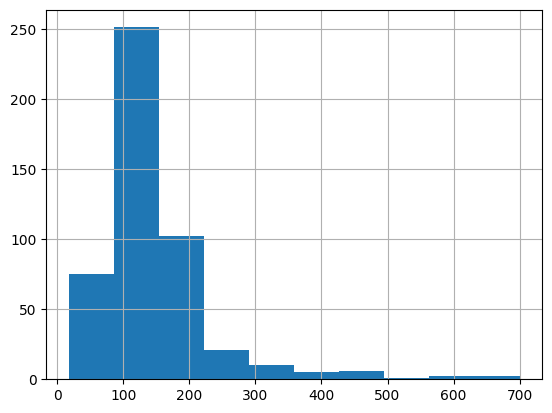

In [268]:
loan_data.LoanAmount.hist()

As it is skewed, lets take median to impute.

In [269]:
median_loanamount=loan_data.LoanAmount.median()
print(median_loanamount)

126.0


In [270]:
loan_data.LoanAmount.fillna(median_loanamount,inplace=True)
test_data.LoanAmount.fillna(median_loanamount,inplace=True)

print(loan_data.loc[104])
print(test_data.loc[11])

Gender                       Male
Married                       Yes
Dependents                     3+
Education            Not Graduate
Self_Employed                  No
ApplicantIncome              3992
CoapplicantIncome             0.0
LoanAmount                  126.0
Loan_Amount_Term            180.0
Credit_History                1.0
Property_Area               Urban
Loan_Status                     0
Name: 104, dtype: object
Gender                  Female
Married                     No
Dependents                   1
Education             Graduate
Self_Employed              Yes
ApplicantIncome           7451
CoapplicantIncome          0.0
LoanAmount               126.0
Loan_Amount_Term         360.0
Credit_History             1.0
Property_Area        Semiurban
Name: 11, dtype: object


Nulls in Loan_Amount_Term.

In [271]:
loan_data[loan_data.Loan_Amount_Term.isnull()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
3,Male,Yes,0,Not Graduate,Yes,4695,0.0,96.0,NaN,1.0,Urban,1
26,Male,Yes,3+,Not Graduate,No,4755,0.0,95.0,NaN,0.0,Semiurban,0
34,Female,No,0,Not Graduate,No,2720,0.0,80.0,NaN,0.0,Urban,0
44,Male,Yes,0,Not Graduate,No,3572,4114.0,152.0,NaN,0.0,Rural,0
53,Male,Yes,0,Graduate,No,3707,3166.0,182.0,NaN,1.0,Rural,1
57,Male,Yes,0,Graduate,No,7578,1010.0,175.0,NaN,1.0,Semiurban,1
109,Male,No,0,Not Graduate,No,3189,2598.0,120.0,NaN,1.0,Rural,1
185,Male,No,0,Graduate,No,5124,0.0,124.0,NaN,0.0,Rural,0
270,Male,Yes,0,Graduate,No,2600,3500.0,115.0,NaN,1.0,Urban,1
326,Female,No,0,Graduate,No,3410,0.0,88.0,NaN,1.0,Urban,1


In [272]:
test_data[test_data.Loan_Amount_Term.isnull()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
25,Male,Yes,0,Graduate,No,1828,1330.0,100.0,NaN,0.0,Urban


In [273]:
median_Loan_Amount_Term=loan_data.Loan_Amount_Term.mode()[0]
print(median_Loan_Amount_Term)

loan_data.Loan_Amount_Term.fillna(median_Loan_Amount_Term,inplace=True)
test_data.Loan_Amount_Term.fillna(median_Loan_Amount_Term,inplace=True)

print(loan_data.loc[3])
print(test_data.loc[25])

360.0
Gender                       Male
Married                       Yes
Dependents                      0
Education            Not Graduate
Self_Employed                 Yes
ApplicantIncome              4695
CoapplicantIncome             0.0
LoanAmount                   96.0
Loan_Amount_Term            360.0
Credit_History                1.0
Property_Area               Urban
Loan_Status                     1
Name: 3, dtype: object
Gender                   Male
Married                   Yes
Dependents                  0
Education            Graduate
Self_Employed              No
ApplicantIncome          1828
CoapplicantIncome      1330.0
LoanAmount              100.0
Loan_Amount_Term        360.0
Credit_History            0.0
Property_Area           Urban
Name: 25, dtype: object


In [274]:
loan_data.dropna(inplace=True)

In [275]:
loan_data.reset_index(drop=True)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Female,No,0,Graduate,No,4547,0.0,115.0,360.0,1.0,Semiurban,1
1,Male,Yes,3+,Not Graduate,Yes,5703,0.0,130.0,360.0,1.0,Rural,1
2,Female,Yes,0,Graduate,No,4333,2451.0,110.0,360.0,1.0,Urban,0
3,Male,Yes,0,Not Graduate,Yes,4695,0.0,96.0,360.0,1.0,Urban,1
4,Male,Yes,2,Graduate,No,6700,1750.0,230.0,300.0,1.0,Semiurban,1
...,...,...,...,...,...,...,...,...,...,...,...,...
443,Male,Yes,1,Graduate,Yes,9833,1833.0,182.0,180.0,1.0,Urban,1
444,Female,No,1,Graduate,No,3812,0.0,112.0,360.0,1.0,Rural,1
445,Male,Yes,1,Graduate,No,14583,0.0,185.0,180.0,1.0,Rural,1
446,Male,No,0,Graduate,No,1836,33837.0,90.0,360.0,1.0,Urban,0


In [276]:
loan_data[loan_data.Credit_History.isnull()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [277]:
test_data[test_data.Credit_History.isnull()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
31,Female,No,0,Graduate,No,3166,2985.0,132.0,360.0,NaN,Rural
45,Male,Yes,1,Not Graduate,No,4050,5302.0,138.0,360.0,NaN,Rural
57,Female,No,0,Graduate,No,2667,1625.0,84.0,360.0,NaN,Urban
64,Female,No,0,Graduate,No,3692,0.0,93.0,360.0,NaN,Rural
67,Female,No,1,Graduate,No,3541,0.0,112.0,360.0,NaN,Semiurban
103,Male,Yes,3+,Not Graduate,Yes,3333,2166.0,130.0,360.0,NaN,Semiurban
120,Female,Yes,0,Not Graduate,No,3017,663.0,102.0,360.0,NaN,Semiurban


In [278]:
mode_Credit_History=loan_data.Credit_History.mode()[0]
print(mode_Credit_History)

loan_data.Credit_History.fillna(mode_Credit_History,inplace=True)
test_data.Credit_History.fillna(mode_Credit_History,inplace=True)

print(test_data.loc[31])

1.0
Gender                 Female
Married                    No
Dependents                  0
Education            Graduate
Self_Employed              No
ApplicantIncome          3166
CoapplicantIncome      2985.0
LoanAmount              132.0
Loan_Amount_Term        360.0
Credit_History            1.0
Property_Area           Rural
Name: 31, dtype: object


In [279]:
loan_data.isnull().sum().sum()

0

In [280]:
test_data.isnull().sum().sum()

0

Check for Correlations.

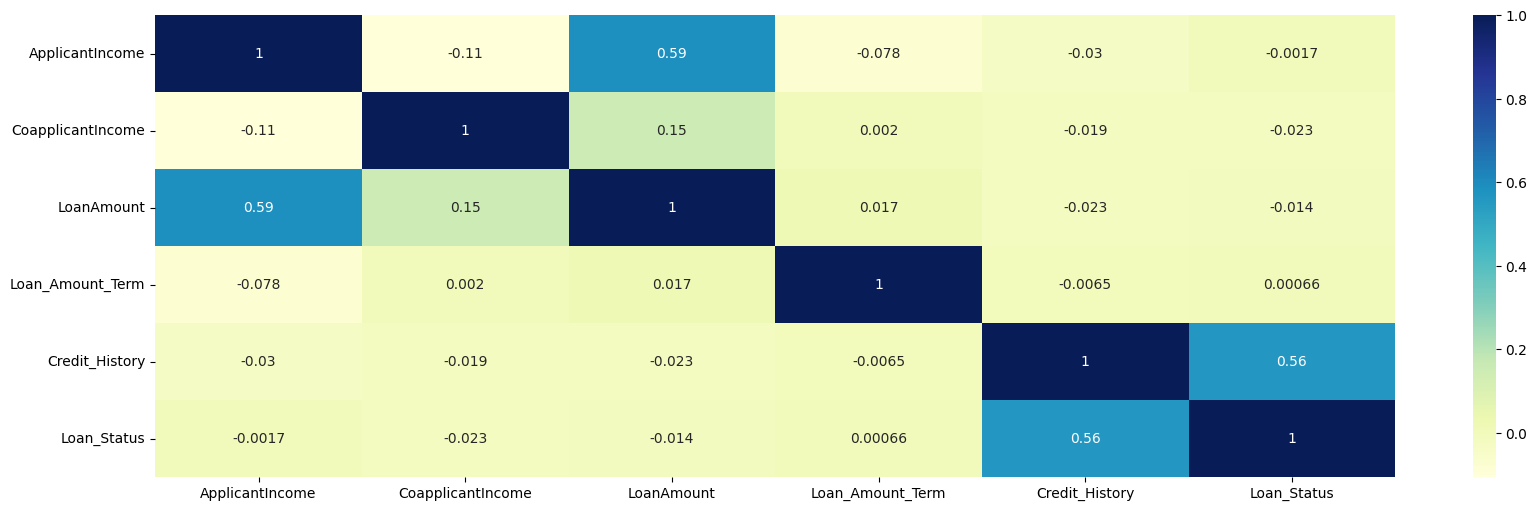

In [281]:
plt.figure(figsize=(20,6))
sns.heatmap(loan_data.corr(), cmap="YlGnBu", annot=True)
plt.show()

Loan_Status may have coorelation with Credit history but thats not too high.

#### Feature engineering.

Lets check distributions of ApplicantIncome and Coapplicant income.

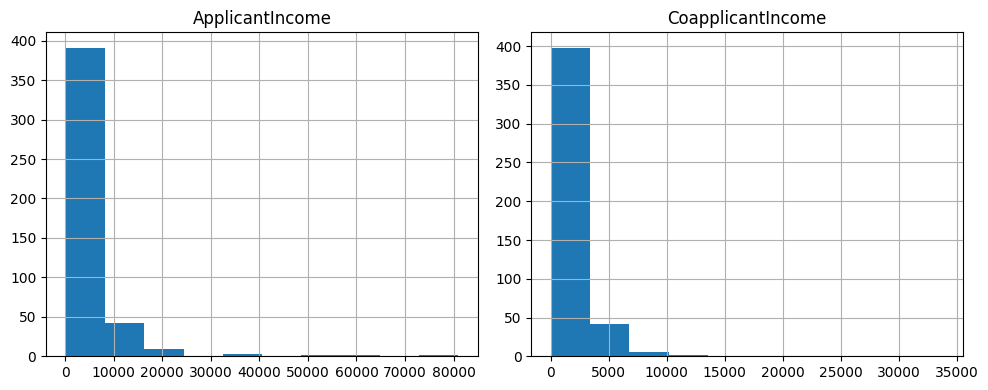

In [282]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
loan_data.ApplicantIncome.hist()
plt.title('ApplicantIncome')
plt.subplot(1,2,2)
loan_data.CoapplicantIncome.hist()
plt.title('CoapplicantIncome')
plt.tight_layout()
plt.show()

They are skewed to right and may have lot of outliers as well.

#### One Hot encoding for categorical fetaures.

In [283]:
loan_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Female,No,0,Graduate,No,4547,0.0,115.0,360.0,1.0,Semiurban,1
1,Male,Yes,3+,Not Graduate,Yes,5703,0.0,130.0,360.0,1.0,Rural,1
2,Female,Yes,0,Graduate,No,4333,2451.0,110.0,360.0,1.0,Urban,0
3,Male,Yes,0,Not Graduate,Yes,4695,0.0,96.0,360.0,1.0,Urban,1
4,Male,Yes,2,Graduate,No,6700,1750.0,230.0,300.0,1.0,Semiurban,1


In [284]:
loan_data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [285]:
loan_data.reset_index(drop=True,inplace=True)

In [286]:
loan_data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Female,No,0,Graduate,No,4547,0.0,115.0,360.0,1.0,Semiurban,1
1,Male,Yes,3+,Not Graduate,Yes,5703,0.0,130.0,360.0,1.0,Rural,1
2,Female,Yes,0,Graduate,No,4333,2451.0,110.0,360.0,1.0,Urban,0
3,Male,Yes,0,Not Graduate,Yes,4695,0.0,96.0,360.0,1.0,Urban,1
4,Male,Yes,2,Graduate,No,6700,1750.0,230.0,300.0,1.0,Semiurban,1
...,...,...,...,...,...,...,...,...,...,...,...,...
443,Male,Yes,1,Graduate,Yes,9833,1833.0,182.0,180.0,1.0,Urban,1
444,Female,No,1,Graduate,No,3812,0.0,112.0,360.0,1.0,Rural,1
445,Male,Yes,1,Graduate,No,14583,0.0,185.0,180.0,1.0,Rural,1
446,Male,No,0,Graduate,No,1836,33837.0,90.0,360.0,1.0,Urban,0


In [287]:
cat_cols=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','Credit_History', 'Property_Area']

In [288]:
for i in cat_cols:
    print(i)
    print('Train set:',sorted(loan_data[i].unique()))
    print('Test set:',sorted(test_data[i].unique()))

Gender
Train set: ['Female', 'Male']
Test set: ['Female', 'Male']
Married
Train set: ['No', 'Yes']
Test set: ['No', 'Yes']
Dependents
Train set: ['0', '1', '2', '3+']
Test set: ['0', '1', '2', '3+']
Education
Train set: ['Graduate', 'Not Graduate']
Test set: ['Graduate', 'Not Graduate']
Self_Employed
Train set: ['No', 'Yes']
Test set: ['No', 'Yes']
Credit_History
Train set: [0.0, 1.0]
Test set: [0.0, 1.0]
Property_Area
Train set: ['Rural', 'Semiurban', 'Urban']
Test set: ['Rural', 'Semiurban', 'Urban']


In [289]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown = 'ignore')
load_df_encoded = ohe.fit_transform(loan_data[cat_cols]).toarray()
test_df_encoded = ohe.transform(test_data[cat_cols]).toarray()

load_df_encoded

array([[1., 0., 1., ..., 0., 1., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 1., 1., ..., 0., 0., 1.],
       [0., 1., 0., ..., 1., 0., 0.]])

In [290]:
len(load_df_encoded)

448

In [291]:
len(loan_data)

448

In [292]:
loan_df=loan_data.drop(cat_cols,axis=1);print(loan_df.shape)
test_df=test_data.drop(cat_cols,axis=1);print(test_df.shape)

(448, 5)
(123, 4)


In [293]:
loan_df

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status
0,4547,0.0,115.0,360.0,1
1,5703,0.0,130.0,360.0,1
2,4333,2451.0,110.0,360.0,0
3,4695,0.0,96.0,360.0,1
4,6700,1750.0,230.0,300.0,1
...,...,...,...,...,...
443,9833,1833.0,182.0,180.0,1
444,3812,0.0,112.0,360.0,1
445,14583,0.0,185.0,180.0,1
446,1836,33837.0,90.0,360.0,0


In [294]:
loan_df=pd.concat([loan_df,pd.DataFrame(load_df_encoded, columns=ohe.get_feature_names_out(loan_data[cat_cols].columns))],axis=1);print(loan_df.shape)
test_df=pd.concat([test_df,pd.DataFrame(test_df_encoded, columns=ohe.get_feature_names_out(test_data[cat_cols].columns))],axis=1);print(test_df.shape)

(448, 22)
(123, 21)


In [295]:
loan_df.tail()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,...,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Credit_History_0.0,Credit_History_1.0,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
443,9833,1833.0,182.0,180.0,1,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
444,3812,0.0,112.0,360.0,1,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
445,14583,0.0,185.0,180.0,1,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
446,1836,33837.0,90.0,360.0,0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
447,2785,2016.0,110.0,360.0,1,0.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0


#### Check for class imbalance.

In [296]:
round(loan_df.Loan_Status.value_counts()/loan_df.shape[0]*100,2)

1    69.64
0    30.36
Name: Loan_Status, dtype: float64

There is imbalance, lets use SMOTE to increase the minority class synthetically.

Before that lets split the dataset into X and Y.

In [297]:
X=loan_df.drop('Loan_Status',axis=1)
Y=loan_df.Loan_Status

In [298]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state = 42)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(403, 21) (45, 21) (403,) (45,)


In [299]:
Y_train.value_counts()

1    285
0    118
Name: Loan_Status, dtype: int64

In [300]:
#!pip install imblearn

In [301]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 25, sampling_strategy = 1.0)

In [302]:
X_train, Y_train = sm.fit_resample(X_train, Y_train)

In [303]:
Y_train.value_counts()

1    285
0    285
Name: Loan_Status, dtype: int64

In [304]:
X_train.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,...,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Credit_History_0.0,Credit_History_1.0,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,3500,0.0,81.0,300.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,9538,0.0,187.0,360.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,1538,1425.0,30.0,360.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,5167,3167.0,200.0,360.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,1782,2232.0,107.0,360.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0


#### Scale the data.

In [305]:
from sklearn.preprocessing import StandardScaler
ss2=StandardScaler()
X_train_scaled=pd.DataFrame(ss2.fit_transform(X_train),columns=X_train.columns)
X_test_scaled=pd.DataFrame(ss2.transform(X_test),columns=X_test.columns)
test_df_scaled=pd.DataFrame(ss2.transform(test_df),columns=test_df.columns)
print(X_train_scaled.shape,X_test_scaled.shape,test_df_scaled.shape)

(570, 21) (45, 21) (123, 21)


### Model building:

In [306]:
from sklearn.linear_model import LogisticRegression
logit=LogisticRegression()
logit.fit(X_train,Y_train)
print(logit)
Y_pred_logit=logit.predict(X_test)
f1_logit=f1_score(Y_test,Y_pred_logit)*100
print(f1_logit)
pd.DataFrame(logit.predict(test_df),columns=['prediction']).to_csv("Sample_Submission.csv",index=False)

LogisticRegression()
75.86206896551724


### Best Model:

In [307]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=42,n_estimators=150,max_depth=4)
rf.fit(X_train,Y_train)
print(rf)

Y_pred_rf=rf.predict(X_test)
f1_rf=f1_score(Y_test,Y_pred_rf)*100
print(f1_rf)
pd.DataFrame(rf.predict(test_df),columns=['prediction']).to_csv("Sample_Submission.csv",index=False)

RandomForestClassifier(max_depth=4, n_estimators=150, random_state=42)
81.25


In [308]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit(X_train, Y_train);print(GNB)

Y_pred_GNB = GNB.predict(X_test)
f1_GNB=f1_score(Y_test,Y_pred_GNB)*100
print(f1_GNB)
pd.DataFrame(GNB.predict(test_df),columns=['prediction']).to_csv("Sample_Submission.csv",index=False)

GaussianNB()
80.64516129032259


In [309]:
from sklearn.svm import SVC
svc = SVC(kernel = 'linear')
svc.fit(X_train, Y_train);print(svc)

Y_pred_svc = svc.predict(X_test)
f1_svc=f1_score(Y_test,Y_pred_svc)*100
print(f1_svc)
pd.DataFrame(svc.predict(test_df),columns=['prediction']).to_csv("Sample_Submission.csv",index=False)

SVC(kernel='linear')
72.41379310344827


In [310]:
import xgboost as xgb
xg=xgb.XGBClassifier(random_state=1,n_estimators=100,max_depth=3,learning_rate=0.01)
xg.fit(X_train,Y_train)
print(xg)
Y_pred_xg=xg.predict(X_test)
f1_xg=f1_score(Y_test,Y_pred_xg)*100
print(f1_xg)
pd.DataFrame(xg.predict(test_df),columns=['prediction']).to_csv("Sample_Submission.csv",index=False)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)
83.07692307692308


In [311]:
from sklearn.ensemble import AdaBoostClassifier
adab = AdaBoostClassifier(learning_rate=0.01, n_estimators=100, random_state=1)
adab.fit(X_train,Y_train)
print(adab)
Y_pred_adab=adab.predict(X_test)
f1_adab=f1_score(Y_test,Y_pred_adab)*100
print(f1_adab)
pd.DataFrame(adab.predict(test_df),columns=['prediction']).to_csv("Sample_Submission.csv",index=False)

AdaBoostClassifier(learning_rate=0.01, n_estimators=100, random_state=1)
83.07692307692308


In [312]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=250, max_depth=4, learning_rate=1)
gbc.fit(X_train,Y_train)
print(gbc)
Y_pred_gbc=gbc.predict(X_test)
f1_gbc=f1_score(Y_test,Y_pred_gbc)*100
print(f1_gbc)
pd.DataFrame(gbc.predict(test_df),columns=['prediction']).to_csv("Sample_Submission.csv",index=False)

GradientBoostingClassifier(learning_rate=1, max_depth=4, n_estimators=250)
77.41935483870968


In [313]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [314]:
# from sklearn.model_selection import RandomizedSearchCV

# gbc = GradientBoostingClassifier()
# parameters = {
#     'n_estimators': [5, 50, 100, 150, 250],
#     'max_depth': [2, 3, 4, 8, 16, 32, None],
#     'learning_rate': [0.03, 0.1, 0.3, 1]
# }
# rs = RandomizedSearchCV(gbc, parameters, cv=5,n_iter=20)
# rs.fit(X_train, Y_train)

#print_results(rs)

In [315]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 17) 
knn.fit(X_train, Y_train)
print(knn)
Y_pred_knn=knn.predict(X_test)
f1_knn=f1_score(Y_test,Y_pred_knn)*100
print(f1_knn)
pd.DataFrame(knn.predict(test_df),columns=['prediction']).to_csv("Sample_Submission.csv",index=False)

KNeighborsClassifier(n_neighbors=17)
64.15094339622641


In [316]:
import lightgbm as lgb

d_train = lgb.Dataset(X_train, label = Y_train)
params = {}

clf = lgb.train(params, d_train, 100)
print(clf)
Y_pred_clf=clf.predict(X_test)
for i in range(0, len(Y_pred_clf)):
    if Y_pred_clf[i]>= 0.5:
        Y_pred_clf[i]=1
    else:  
        Y_pred_clf[i]=0
    
f1_clf=f1_score(Y_test,Y_pred_clf)*100
print(f1_clf)
test_pred=clf.predict(test_df)
test_pr=[]
for i in range(0, len(test_pred)):
    if test_pred[i]>= 0.5:
        test_pr.append(1)
    else:  
        test_pr.append(0)
print(test_pr)
pd.DataFrame(test_pr,columns=['prediction']).to_csv("Sample_Submission.csv",index=False)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000510 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 899
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 21
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

### Pickel the model.

In [317]:
import pickle
with open('loan_application.pickle','wb') as f:
    pickle.dump(rf,f)

In [318]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))

In [319]:
X.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Gender_Female', 'Gender_Male', 'Married_No',
       'Married_Yes', 'Dependents_0', 'Dependents_1', 'Dependents_2',
       'Dependents_3+', 'Education_Graduate', 'Education_Not Graduate',
       'Self_Employed_No', 'Self_Employed_Yes', 'Credit_History_0.0',
       'Credit_History_1.0', 'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

In [320]:
loan_data.Property_Area.value_counts()

Semiurban    173
Rural        139
Urban        136
Name: Property_Area, dtype: int64

In [321]:
def predict_loan_appl(LoanAmount, Loan_Amount_Term, Gender, Married, Dependents, Education, Self_Employed, 
                      Credit_History, Property_Area, ApplicantIncome=0, CoapplicantIncome=0):
    
    # Get medians of loanamount and loan_amount_term, while re-training and assign to below 2 variables.
    median_loanamount=126
    median_loan_amount_term=360
        
    LoanAmount= LoanAmount or median_loanamount
    Loan_Amount_Term = Loan_Amount_Term or median_loan_amount_term
    
    # All categorical features are defaulted to 'else' if there is NULL. Make sure Mode of each feature falls in 'ELSE' part.
    if Gender=='Female':
        g_f=1
        g_m=0
    else:
        g_f=0
        g_m=1
    
    if Married=='No':
        m_y=0
        m_n=1
    else:
        m_y=1
        m_n=0

    dep=Dependents
    dp=np.zeros(4)
    if dep=='1':
        dp[1]=1
    elif dep=='2':
        dp[2]=1
    elif dep=='3+':
        dp[3]=1
    else:
        dp[0]=1
    
    if Education=='Not Graduate':
        e_g=0
        e_n=1
    else:
        e_g=1
        e_n=0
    
    if Self_Employed=='Yes':
        se_n=0
        se_y=1
    else:
        se_n=1
        se_y=0
        
    if Credit_History=='0':
        ch_0=1
        ch_1=0
    else:
        ch_0=0
        ch_1=1
    
    prop_area=Property_Area
    pa=np.zeros(3)
    if prop_area=='Rural':
        pa[0]=1
    elif prop_area=='Urban':
        pa[2]=1
    else:
        pa[1]=1
        
    x = np.zeros(len(X.columns))

    x[0] = ApplicantIncome
    x[1] = CoapplicantIncome
    x[2] = LoanAmount
    x[3] = Loan_Amount_Term
    
    x[4] = g_f
    x[5] = g_m
    x[6] = m_n
    x[7] = m_y
    x[8] = dp[0]
    x[9] = dp[1]
    x[10] = dp[2]
    x[11] = dp[3]
    x[12] = e_g
    x[13] = e_n
    x[14] = se_n
    x[15] = se_y
    x[16] = ch_0
    x[17] = ch_1
    x[18] = pa[0]
    x[19] = pa[1]
    x[20] = pa[2]
    
    return rf.predict([x])[0]


In [322]:
predict_loan_appl(115, 30, 'Female', "No", '3+', 'Graduate', 'No', 'NAN', None,0,1000)

C:\Users\HIMA BINDU\PycharmProjects\MLP ML\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


1

In [323]:
predict_loan_appl(115, 30, 'Female', "No", '3+', 'Graduate', 'No', 'NAN', 'Urban')

C:\Users\HIMA BINDU\PycharmProjects\MLP ML\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


1